<a href="https://colab.research.google.com/github/ARAN-ai-python/SharePrices_AI/blob/main/jupyter%20notebook/%E6%A0%AA%E4%BE%A1%E4%BA%88%E6%B8%AC%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#種々のライブラリをインストールする
#!pip install pandas_datareader
from pandas_datareader import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/narashunsuke/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
#日経株価データを取得する
start = '2019-06-01'
end = '2020-06-01'

df = data.DataReader('^N225', 'yahoo', start, end)

In [ ]:
#取得したデータを覗いてみる
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400000,20410.880859
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200000,20408.539062
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300000,20776.099609
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600000,20774.039062
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700000,20884.710938
2019-06-10,21166.119141,21077.949219,21095.400391,21134.419922,58200000,21134.419922
2019-06-11,21227.179688,21066.619141,21099.539062,21204.279297,52100000,21204.279297
2019-06-12,21259.699219,21118.750000,21130.390625,21129.720703,56500000,21129.720703
2019-06-13,21111.230469,20932.130859,21040.910156,21032.000000,65700000,21032.000000


In [ ]:
#データのインデックス（横軸的属性）を確認する
df.index
#下のデータは時系列データを作るのに適している

DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14',
               ...
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01'],
              dtype='datetime64[ns]', name='Date', length=242, freq=None)

In [ ]:
#グラフをプロットする為に、引数を設定
date = df.index
price = df['Adj Close']

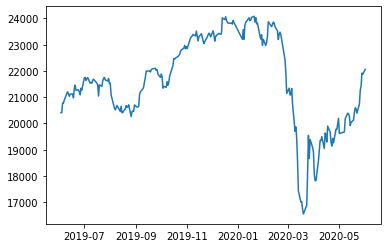

In [ ]:
#(x,y)を引数にしてグラフをプロット
plt.plot(date,price)

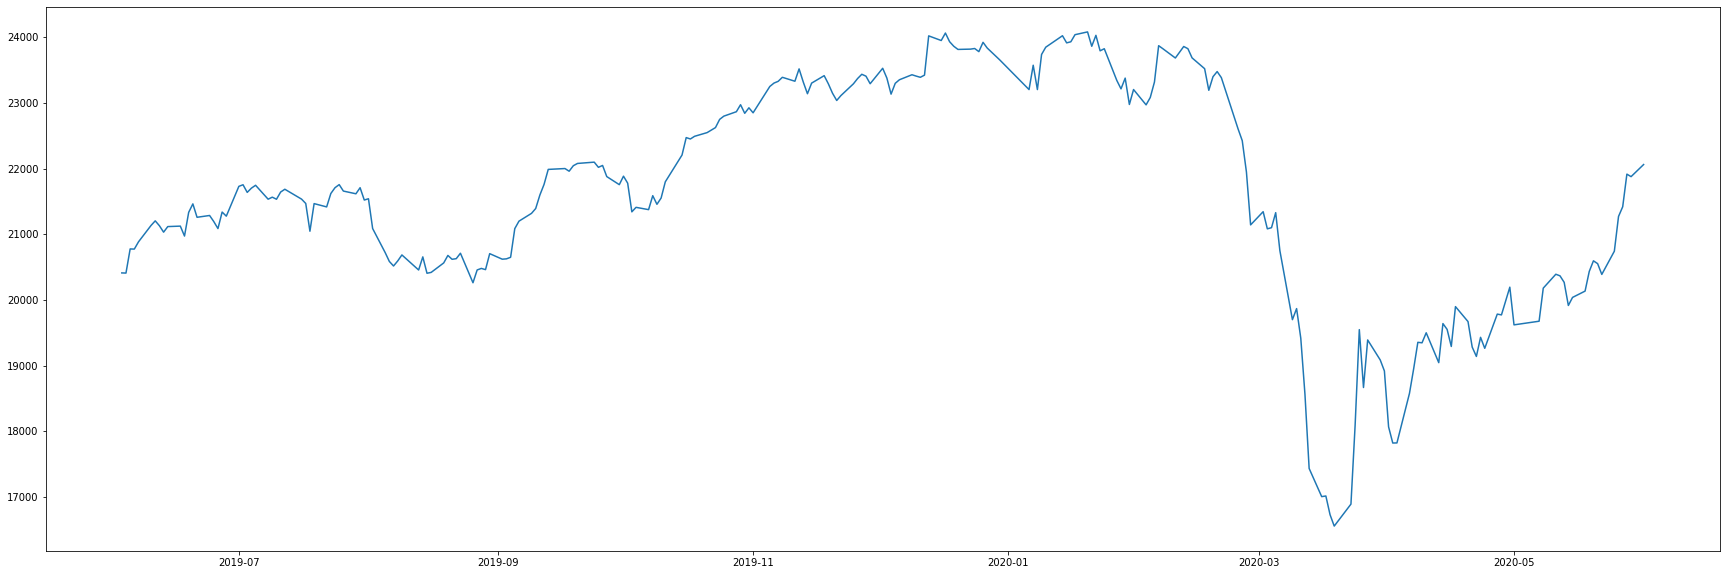

In [ ]:
#グラフが小さいので大きくしてみる
#figsize=(xの大きさ,yの大きさ)で調整
plt.figure(figsize=(30,10))
plt.plot(date,price)

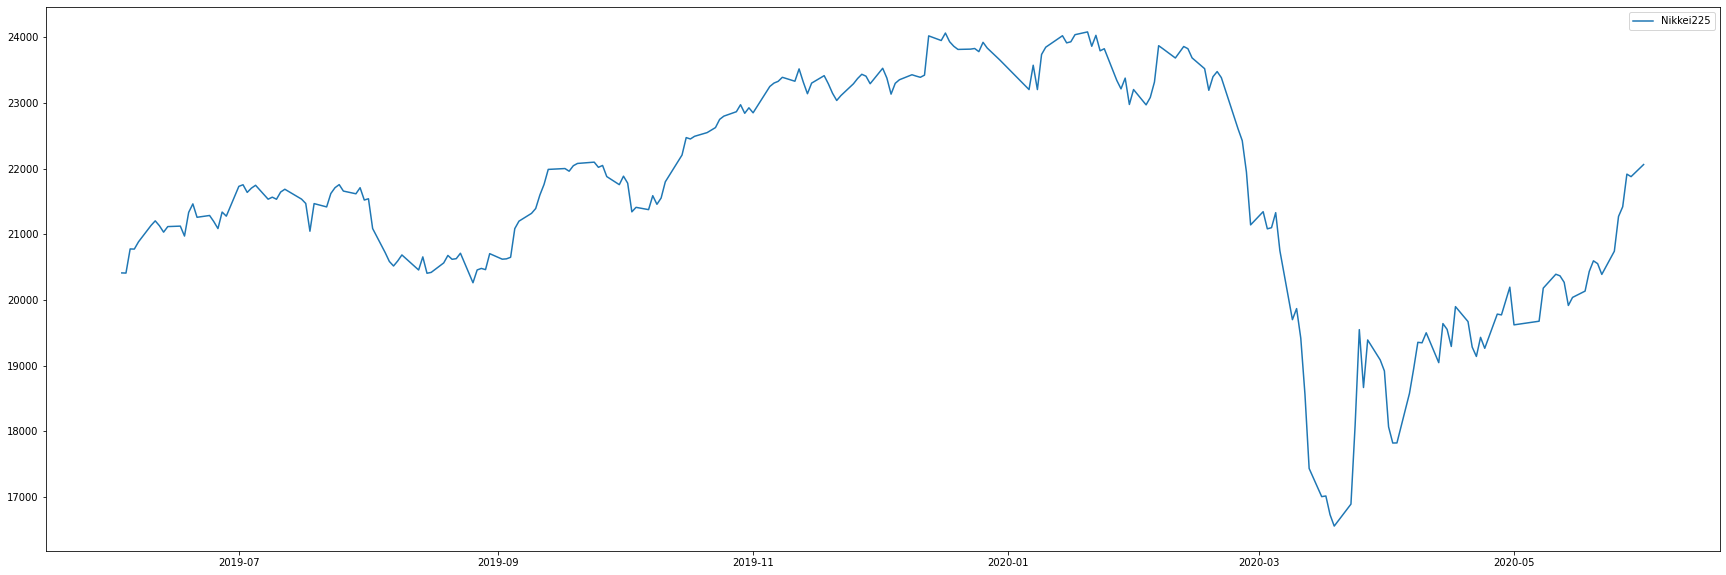

In [ ]:
#引数labelを用いて、凡例をつける
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.legend()

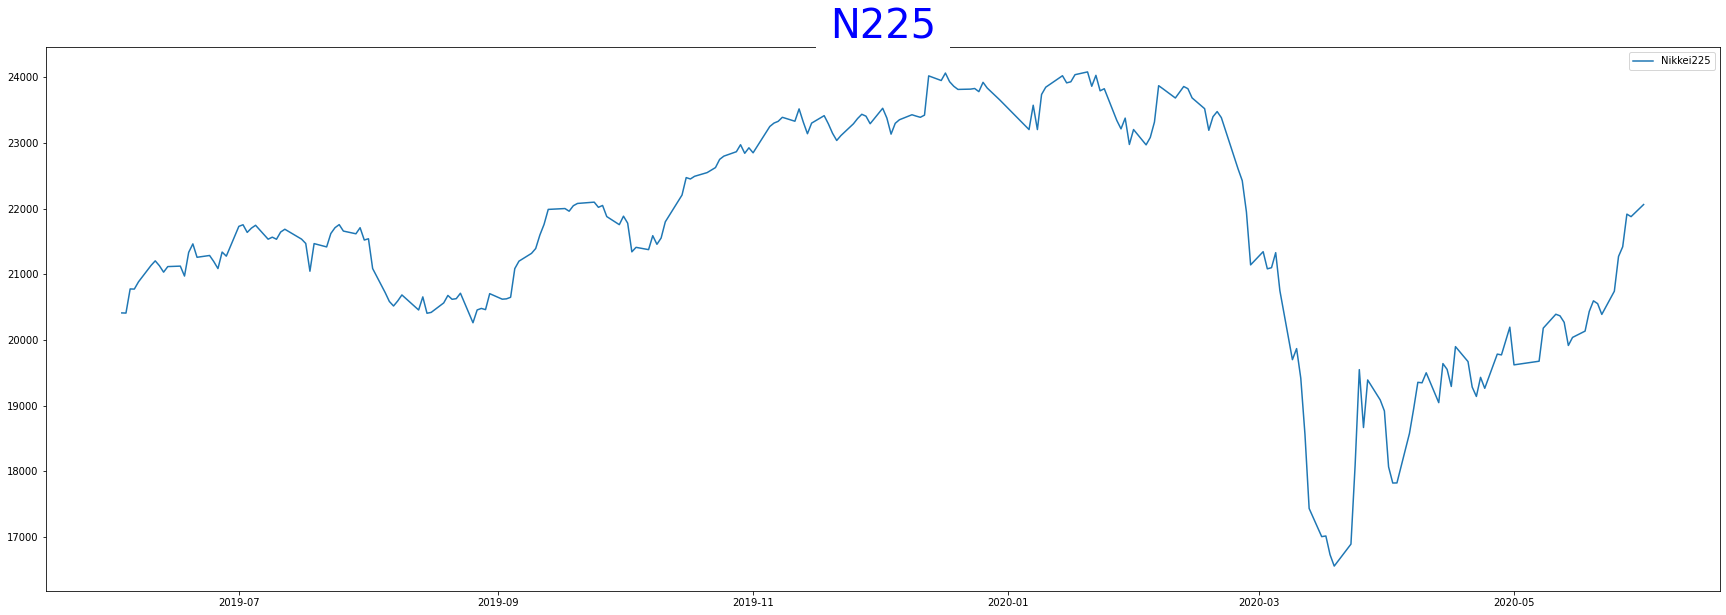

In [ ]:
#タイトルをつける
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.title('N225',color='blue',backgroundcolor='white',size=40,loc='center')
plt.legend()

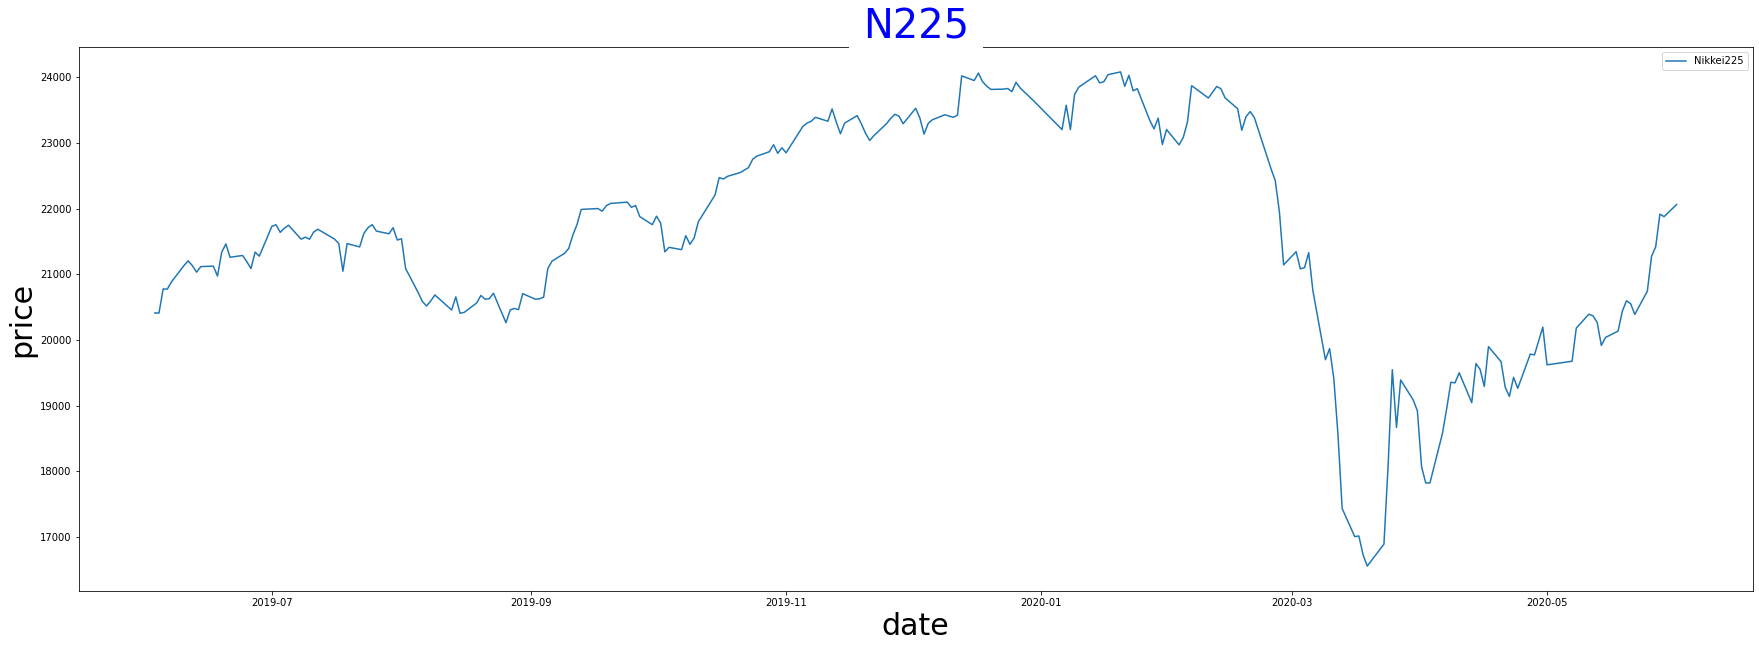

In [ ]:
#x軸とy軸の名前を設定
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225')
plt.title('N225',color='blue',backgroundcolor='white',size=40,loc='center')
plt.xlabel('date',color='black',size=30)
plt.ylabel('price',color='black',size=30)
plt.legend()

In [ ]:
#株価の5,25,50日間の移動平均を計算する
span01 = 5
span02 = 25
span03 = 50

df['sma01'] = price.rolling(window=span01).mean()
df['sma02'] = price.rolling(window=span02).mean()
df['sma03'] = price.rolling(window=span03).mean()

In [ ]:
#上位100件を覗いてみる
df.head(100)
#jupyternotebookの仕様で除けない

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03
Date,,,,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400000,20410.880859,NaN,NaN,NaN
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200000,20408.539062,NaN,NaN,NaN
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300000,20776.099609,NaN,NaN,NaN
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600000,20774.039062,NaN,NaN,NaN
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700000,20884.710938,20650.853906,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-10-21,22581.279297,22515.730469,22541.220703,22548.900391,48400000,22548.900391,22434.714062,21919.802344,21315.456172
2019-10-23,22648.810547,22457.890625,22619.769531,22625.380859,68000000,22625.380859,22518.348047,21954.433203,21357.632578
2019-10-24,22780.990234,22704.330078,22725.439453,22750.599609,61300000,22750.599609,22573.883984,21984.925625,21400.777578


In [ ]:
#制約を壊そう
pd.set_option('display.max_rows',None)
df.head(100)

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03
Date,,,,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400000,20410.880859,NaN,NaN,NaN
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200000,20408.539062,NaN,NaN,NaN
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300000,20776.099609,NaN,NaN,NaN
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600000,20774.039062,NaN,NaN,NaN
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700000,20884.710938,20650.853906,NaN,NaN
2019-06-10,21166.119141,21077.949219,21095.400391,21134.419922,58200000,21134.419922,20795.561719,NaN,NaN
2019-06-11,21227.179688,21066.619141,21099.539062,21204.279297,52100000,21204.279297,20954.709766,NaN,NaN
2019-06-12,21259.699219,21118.750000,21130.390625,21129.720703,56500000,21129.720703,21025.433984,NaN,NaN
2019-06-13,21111.230469,20932.130859,21040.910156,21032.000000,65700000,21032.000000,21077.026172,NaN,NaN


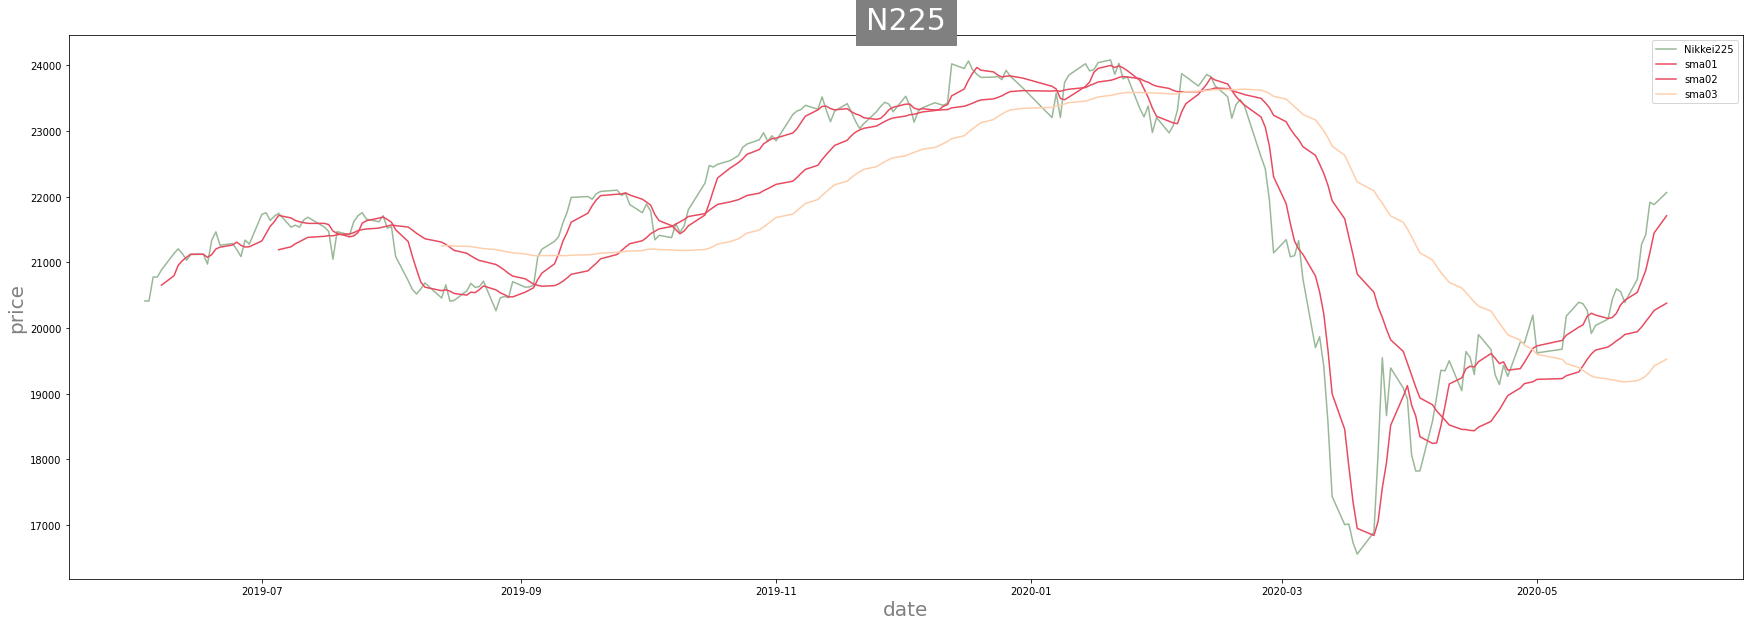

In [ ]:
#グラフにも追加する
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#e84a5f')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')

plt.title('N225',color='white',backgroundcolor='grey',size=30,loc='center')
plt.xlabel('date',color='grey',size=20)
plt.ylabel('price',color='grey',size=20)
plt.legend()
#このグラフを元にゴールデンクロスやデッドクロス等の分析手法で株価の推移を分析する

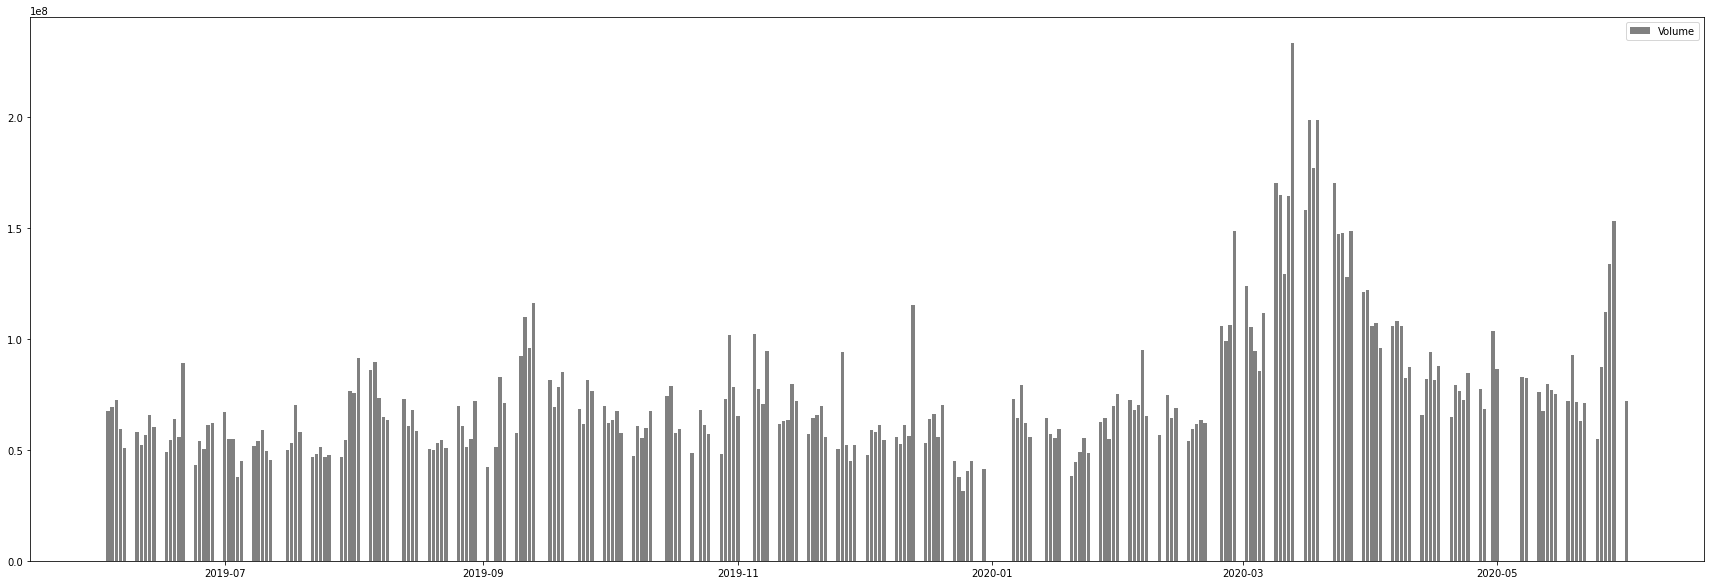

In [ ]:
#棒グラフをプロットする
plt.figure(figsize=(30,10))
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

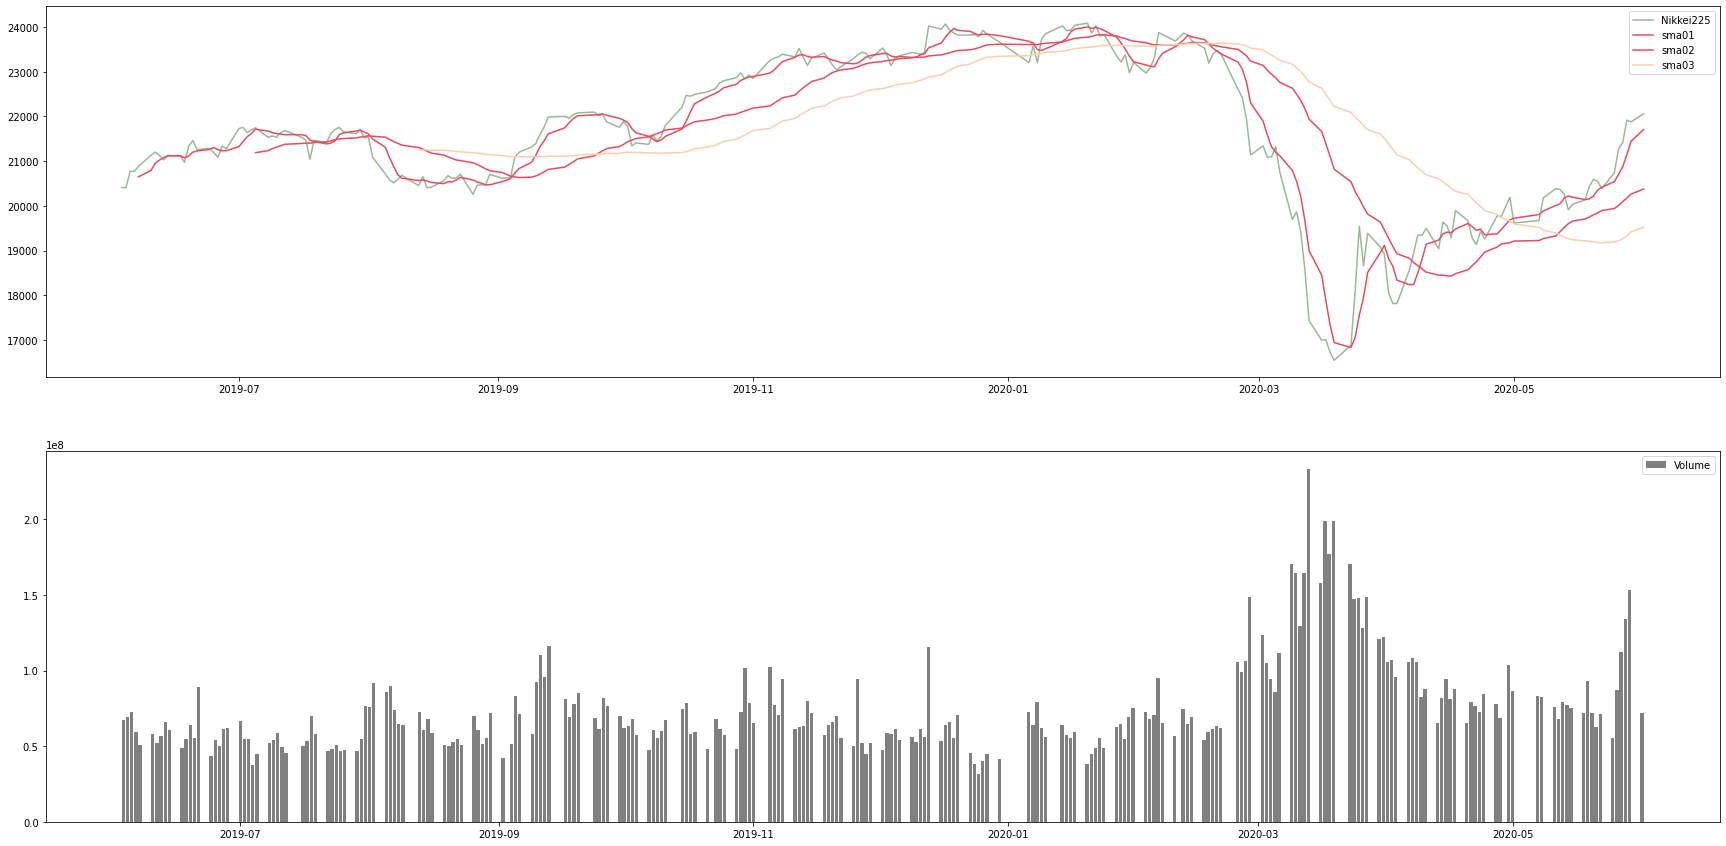

In [ ]:
#2つのグラフを同時にプロットする
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,price,label='Nikkei225',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#e84a5f')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

In [ ]:
#個別銘柄データの取得
#東京証券取引所のサイトから欲しい銘柄の証券コードを調べる(博報堂でやってみた)
#データソース(データを取得するサイト)を選ぶ(例題通りstooqを使う)
df = data.DataReader('2433.jp','stooq')

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-06-11,1798.0,1811.0,1783.0,1795.0,733300
2021-06-10,1781.0,1798.0,1767.0,1795.0,542600
2021-06-09,1845.0,1847.0,1799.0,1799.0,588500
2021-06-08,1860.0,1872.0,1850.0,1860.0,272000
2021-06-07,1839.0,1857.0,1832.0,1852.0,301900


In [ ]:
df.index.min()

Timestamp('2016-06-16 00:00:00')

In [ ]:
df.index.max()

Timestamp('2021-06-11 00:00:00')

In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-22,1138.93,1138.93,1122.35,1126.03,568335
2016-06-21,1131.56,1146.30,1114.99,1143.54,1015772
2016-06-20,1133.39,1146.30,1125.11,1131.56,643648
2016-06-17,1110.36,1137.08,1110.36,1115.89,1061460
2016-06-16,1136.18,1150.92,1113.13,1114.99,1142635


In [ ]:
#上記のテーブルより、降順にデータが並んでいる事が分かる為、昇順に並び替える
df = df.sort_index()

In [ ]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-16,1136.18,1150.92,1113.13,1114.99,1142635
2016-06-17,1110.36,1137.08,1110.36,1115.89,1061460
2016-06-20,1133.39,1146.30,1125.11,1131.56,643648
2016-06-21,1131.56,1146.30,1114.99,1143.54,1015772
2016-06-22,1138.93,1138.93,1122.35,1126.03,568335
2016-06-23,1132.49,1148.13,1129.72,1145.39,816959
2016-06-24,1151.84,1161.96,1057.85,1067.06,1525829
2016-06-27,1090.10,1120.51,1083.64,1118.66,910288
2016-06-28,1104.83,1130.63,1098.38,1121.43,796882


In [ ]:
#2019年6月1日以降のデータを取得するため、日時の条件を絞る
df.index>='2020-06-01 00:00:00'

array([False, False, False, ...,  True,  True,  True])

In [ ]:
#その条件を満たすインデックスを添字に指定し、条件に合う日時以降の行だけ表示する
df[df.index>='2020-06-01 00:00:00']

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-01,1307.55,1313.50,1287.71,1301.60,672532
2020-06-02,1319.46,1353.19,1300.61,1341.28,678781
2020-06-03,1370.05,1390.88,1356.16,1363.11,835927
2020-06-04,1384.93,1385.92,1317.47,1347.23,747930
2020-06-05,1346.24,1356.16,1322.43,1351.20,479502
2020-06-08,1375.01,1377.00,1356.16,1377.00,572237
2020-06-09,1378.98,1382.95,1350.21,1360.13,537159
2020-06-10,1347.23,1348.23,1302.59,1332.35,755288
2020-06-11,1304.57,1320.45,1270.84,1272.83,796918


In [ ]:
df[df.index<='2021-04-01']

,Open,High,Low,Close,Volume
Date,,,,,
2016-06-16,1136.18,1150.92,1113.13,1114.99,1142635
2016-06-17,1110.36,1137.08,1110.36,1115.89,1061460
2016-06-20,1133.39,1146.30,1125.11,1131.56,643648
2016-06-21,1131.56,1146.30,1114.99,1143.54,1015772
2016-06-22,1138.93,1138.93,1122.35,1126.03,568335
2016-06-23,1132.49,1148.13,1129.72,1145.39,816959
2016-06-24,1151.84,1161.96,1057.85,1067.06,1525829
2016-06-27,1090.10,1120.51,1083.64,1118.66,910288
2016-06-28,1104.83,1130.63,1098.38,1121.43,796882


In [ ]:
df[(df.index>='2020-06-01') & (df.index<='2021-04-01')]

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-01,1307.55,1313.50,1287.71,1301.60,672532
2020-06-02,1319.46,1353.19,1300.61,1341.28,678781
2020-06-03,1370.05,1390.88,1356.16,1363.11,835927
2020-06-04,1384.93,1385.92,1317.47,1347.23,747930
2020-06-05,1346.24,1356.16,1322.43,1351.20,479502
2020-06-08,1375.01,1377.00,1356.16,1377.00,572237
2020-06-09,1378.98,1382.95,1350.21,1360.13,537159
2020-06-10,1347.23,1348.23,1302.59,1332.35,755288
2020-06-11,1304.57,1320.45,1270.84,1272.83,796918


In [ ]:
#今までのコードを関数化する
#SharePricesGraphing = SPG
def wma(w):
    weight = np.arange(len(w)) + 1
    wma = np.sum(weight * w) / weight.sum()
    return wma

def ema(e,p):
    ema = np.zeros(len(e))
    ema[:] = np.nan
    ema[p-1] = e[:p].mean()
    
    for d in range(p,len(e)):
        ema[d] = ema[d-1] + (e[d] - e[d-1]) / (p+1) * 2
    return ema

def SPG(start,end,company_code):
    df = data.DataReader(company_code,"stooq")
    df = df[(df.index>=start) & (df.index<=end)]
    
    date = df.index
    price = df['Close']
    
    span01 = 5
    span02 = 25
    span03 = 50
    
    df['sma01'] = price.rolling(window=span01).mean()
    df['sma02'] = price.rolling(window=span02).mean()
    df['sma03'] = price.rolling(window=span03).mean()
    
    #weights = np.array([range(1,i) for i in [6,26,51]])
    #weights01 = [i for i in range(1,span01+1)]
    #weights02 = [i for i in range(1,span02+1)]
    #weights03 = [i for i in range(1,span03+1)]
    df['wma01'] = price.rolling(window=span01).apply(wma,raw=True).round(1)
    df['wma02'] = price.rolling(window=span02).apply(wma,raw=True).round(1)
    df['wma03'] = price.rolling(window=span03).apply(wma,raw=True).round(1)
    
    df['ema01'] = ema(price,span01).round(1)
    df['ema02'] = ema(price,span02).round(1)
    df['ema03'] = ema(price,span03).round(1)
    
    plt.figure(figsize=(30,15))
    
    #移動平均
    plt.subplot(4,1,1)
    plt.title('SMA',color='black',backgroundcolor='white',size=30,loc='center')
    plt.plot(date,price,label='Close',color='black')
    plt.plot(date,df['sma01'],label='sma01',color='red')
    plt.plot(date,df['sma02'],label='sma02',color='blue')
    plt.plot(date,df['sma03'],label='sma03',color='green')
    plt.legend()
    
    #加重移動平均
    plt.subplot(4,1,2)
    plt.title('WMA',color='black',backgroundcolor='white',size=30,loc='center')
    plt.plot(date,price,label='Close',color='black')
    plt.plot(date,df['wma01'],label='wma01',color='red')
    plt.plot(date,df['wma02'],label='wma02',color='blue')
    plt.plot(date,df['wma03'],label='wma03',color='green')
    plt.legend()
    
    #指数移動平均
    plt.subplot(4,1,3)
    plt.title('EMA',color='black',backgroundcolor='white',size=30,loc='center')
    plt.plot(date,price,label='Close',color='black')
    plt.plot(date,df['ema01'],label='ema01',color='red')
    plt.plot(date,df['ema02'],label='ema02',color='blue')
    plt.plot(date,df['ema03'],label='ema03',color='green')
    #print(df['ema01'],df['ema02'],df['ema03'])
    plt.legend()
    
    #取引量
    plt.subplot(4,1,4)
    plt.title('Volume',color='black',backgroundcolor='white',size=30,loc='center')
    plt.bar(date,df['Volume'],label='Volume',color='grey')
    plt.legend()

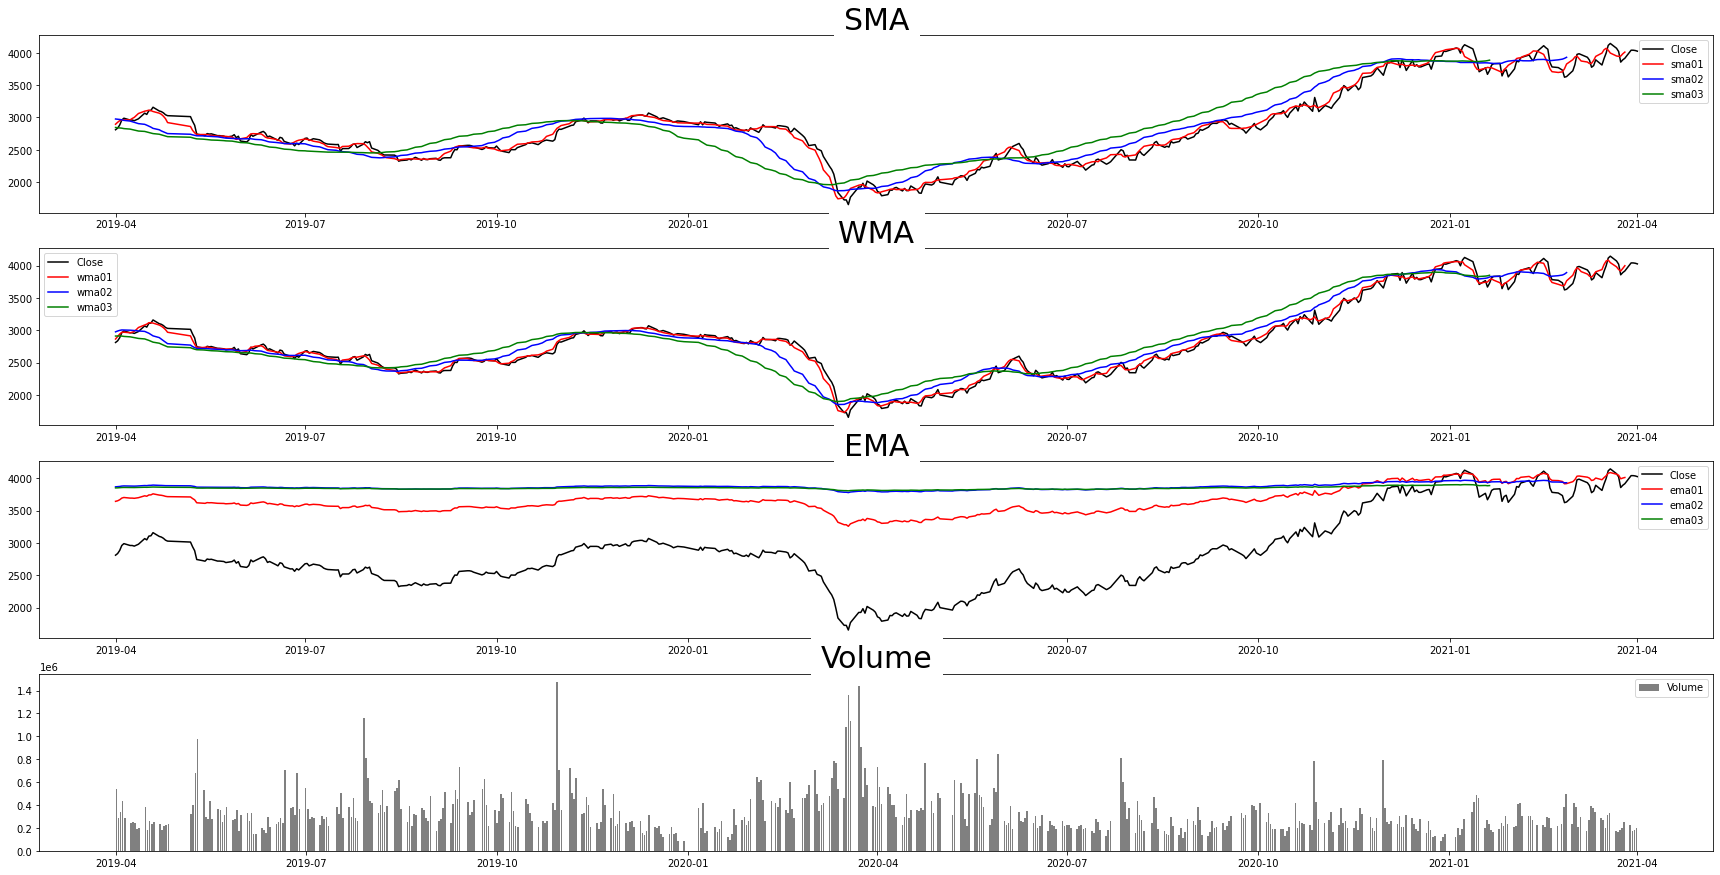

In [ ]:
SPG('2019-04-01','2021-04-01','7988.jp')

In [ ]:
#株価予測プログラム　修了

weights = np.array([range(1,i) for i in [6,26,51]])
weights[0]

np.arange(1,6)
print([i for i in range(1,6)])

[1, 2, 3, 4, 5]


/Users/narashunsuke/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import datetime

In [ ]:
#SharePricesPrediction = SPP
def SPP(start,end,company_code):
    #株価データをスクレイピングし、指定された範囲に前処理する。
    df = data.DataReader(company_code,"stooq")
    df = df[(df.index>=start) & (df.index<=end)]
    #print(df)
    date = df.index
    price = df["Close"].to_numpy()
    df = df.drop('Close',axis=1)
    #print(df)
    #print(price)
    
    #単回帰分析の人工知能（AI）モデルを作成し、学習させる。
    model = LinearRegression()
    model.fit(df,price)
    
    #学習させたAIモデルの精度を評価する。
    #print(price)
    #print(model.predict(df))
    print('MAE:',mean_absolute_error(price,model.predict(df)))
    print('MSE:',mean_squared_error(price,model.predict(df)))
    print('RMSE:',np.sqrt(mean_squared_error(price,model.predict(df))))
    print('決定係数R^2:',model.score(df,price))
    
    #予測データをデータテーブルに変換する。
    df_p = model.predict(df).reshape((len(model.predict(df)),1))
    #print(df_p)
    df_p = pd.DataFrame(data=df_p,index=date,columns=['Close_p'])
    #print(df_p)
    
    #実データと予測データをグラフにプロットする。
    plt.figure(figsize=(30,15))
    plt.subplot(2,1,1)
    plt.title('Train',color='black',backgroundcolor='white',size=30,loc='center')
    plt.plot(date,price,label='Close',color='red')
    plt.plot(date,df_p['Close_p'],label='Close_p',color='blue')
    plt.legend()
    
    #株価データを再度スクレイピングし、一年後の範囲で前処理する。
    #time = datetime.datetime(1,0,0,0,0,0,0)
    start = datetime.datetime.strptime(start,'%Y-%m-%d')
    end = datetime.datetime.strptime(end,'%Y-%m-%d')
    df = data.DataReader(company_code,"stooq")
    df = df[(df.index>=start+datetime.timedelta(days=365)) & (df.index<=end+datetime.timedelta(days=365))]    
    date = df.index
    price = df['Close']
    df = df.drop('Close',axis=1)
    
    #予測データをデータテーブルに変換する。
    df_p = model.predict(df).reshape((len(model.predict(df)),1))
    df_p = pd.DataFrame(data=df_p,index=date,columns=['Close_p'])
    
    #実データと予測データをグラフにプロットする。
    plt.subplot(2,1,2)
    plt.title('Test',color='black',backgroundcolor='white',size=30,loc='center')
    plt.plot(date,price,label='Close',color='red')
    plt.plot(date,df_p['Close_p'],label='Close_p',color='blue')
    plt.legend()
    

MAE: 10.658718270759657
MSE: 227.9839105894684
RMSE: 15.09913608752065
決定係数R^2: 0.9973043705809422


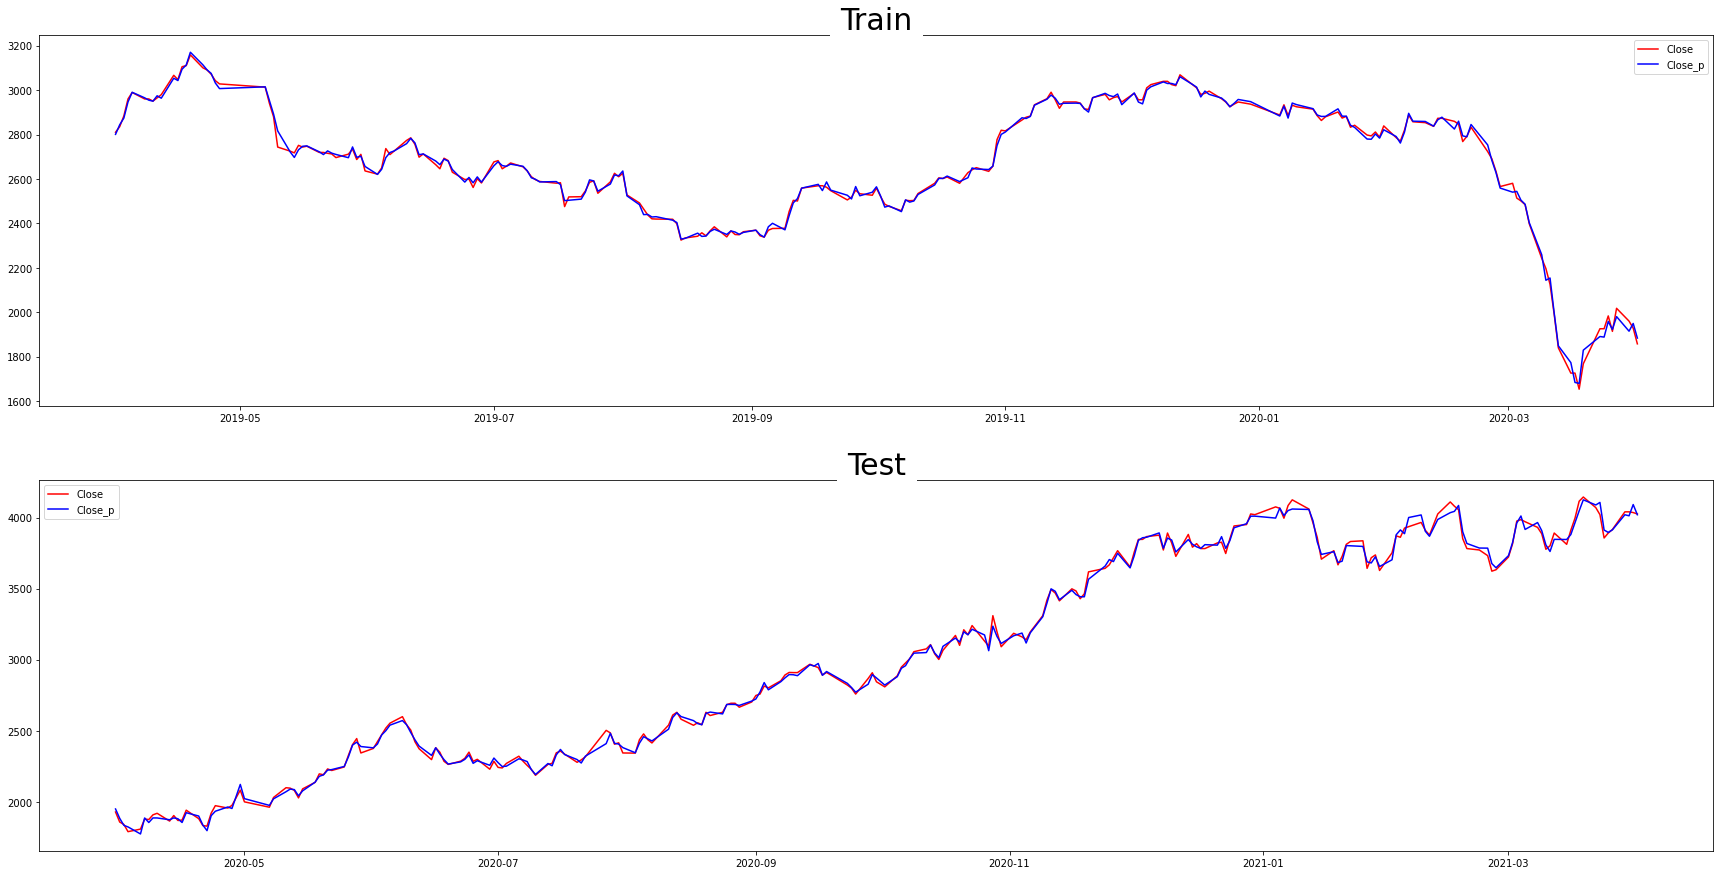

In [ ]:
SPP('2019-04-01','2020-04-01','7988.jp')